# Model

## Importing Data

In [2]:
# Import necessary modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

# Display 100 columns max
pd.set_option('display.max_columns', 100)

# Display 20 characters max within a cell
# pd.set_option('max_colwidth',60)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error

In [52]:
df = pd.read_pickle("autos_golden_20190719.pkl")
df_clean = pd.read_pickle("autos_clean_golden_20190719.pkl")
df_missing = pd.read_pickle("autos_missing_golden_20190719.pkl")

In [4]:
df.shape

(15911, 151)

In [5]:
df_clean.shape

(9975, 150)

In [6]:
df.head()

,co2_emission,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,...,ext_tuned_car,ext_voice_control,ext_winter_tyres,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Duster,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,price
0,99.0,1422.0,66.0,56013.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15770.0
1,129.0,1798.0,141.0,80000.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,5.6,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,4.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,14500.0
2,99.0,1598.0,85.0,83450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14640.0
3,99.0,1422.0,66.0,73000.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.8,0.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,4.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14500.0
4,109.0,1422.0,66.0,16200.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.1,1.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16790.0


## Model

In [7]:
# Create features and target (df)
X = df.drop('price', axis = 1) # features
y = df['price'] # target

In [8]:
# Create features and target (df)
X_c = df_clean.drop('price', axis = 1) # features
y_c = df_clean['price'] # target

In [9]:
# # Create features and target (array)
# X = df.drop('price', axis = 1).values # features
# y = df['price'].values # target

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=57)

In [11]:
# Train-test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size = 0.3, random_state=57)

### Lasso

In [12]:
# Create Alphas, and lists to store scores
alpha_space = np.linspace(1, 20)
lasso_scores = []

# Create a regressor
lasso_ = Lasso(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:
    
    # Specify alpha
    lasso_.alpha = alpha
    
    # Perfrom 5-fold CV
    lasso_cv_scores = cross_val_score(lasso_, X_train, y_train, cv=5)
    
    # Append the mean and std to the lists
    lasso_scores.append(np.mean(lasso_cv_scores))

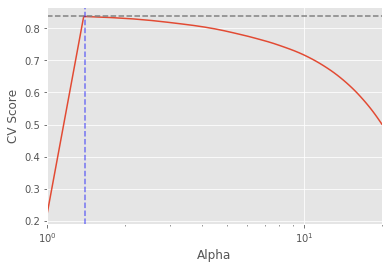

In [13]:
# Create a function to display how cv scores changes with alphas
def display_plot(cv_scores):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    ax.set_ylabel('CV Score')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    ax.axvline(x=1.4, c='b', linestyle='--', alpha=0.5)
    plt.show()
    
display_plot(lasso_scores)

$alpha = 1.4$ seems to be a good choice

In [14]:
# Instantiate Lasso regressor
lasso = Lasso(alpha = 1.4, normalize = True)

# Fit the regressor
lasso.fit(X_train, y_train)

# Print the R-squared
print("R^2: {0:.3f}".format(lasso.score(X_test, y_test)))

R^2: 0.850


In [15]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(lasso, X_test, y_test, cv=5)

print("Average 5-Fold CV Score: {0:.3f}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.856


### Linear Regression

In [16]:
# Create the regressor
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Print the R-squared
print("R^2: {0:.2f}".format(reg.score(X_test, y_test)))

R^2: 0.86


In [17]:
# Create the regressor
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train_c, y_train_c)

# Print the R-squared
print("R^2: {0:.2f}".format(reg.score(X_test_c, y_test_c)))

R^2: 0.89


### Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor(random_state=57, n_estimators=100)

reg_rf.fit(X_train, y_train)

reg_rf.score(X_test, y_test)

#pd.DataFrame({'x':X_hp.columns.values, 'y':reg_rf.feature_importances_})

0.9074030143402722

In [51]:
preds_rf = reg_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds_rf))
print("RMSE: %f" % (rmse))

RMSE: 2256.624283


In [19]:
reg_rf = RandomForestRegressor(random_state=57, n_estimators=100)

reg_rf.fit(X_train_c, y_train_c)

reg_rf.score(X_test_c, y_test_c)

#pd.DataFrame({'x':X_hp.columns.values, 'y':reg_rf.feature_importances_})

0.9564041028161769

In [38]:
preds_rf = reg_rf.predict(X_test_c)

rmse = np.sqrt(mean_squared_error(y_test_c, preds_rf))
print("RMSE: %f" % (rmse))

RMSE: 1417.694077


In [20]:
feature_importance = pd.DataFrame({'features':X_c.columns.values, 'importance':reg_rf.feature_importances_}).sort_values('importance', ascending=False)
feature_importance.head(10).set_index('features')

,importance
features,
hp,0.452566
age,0.189630
km,0.072461
make_Audi,0.057877
model_Espace,0.046592
gearing_type_Manual,0.021433
model_Astra,0.017461
model_A3,0.013834
displacement,0.012800


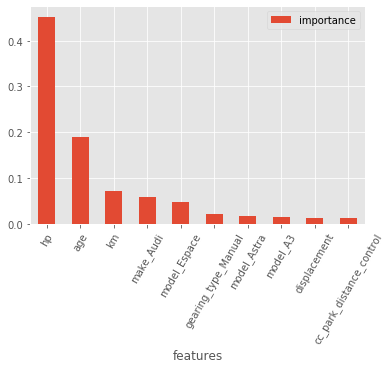

In [48]:
feature_importance.set_index('features')[:10].plot.bar(rot=60)

### XGBoost with Dropped Missing Values

In [45]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(X_train_c, y_train_c)

preds = xg_reg.predict(X_test_c)

rmse = np.sqrt(mean_squared_error(y_test_c, preds))
print("RMSE: %f" % (rmse))

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE: 1482.357043


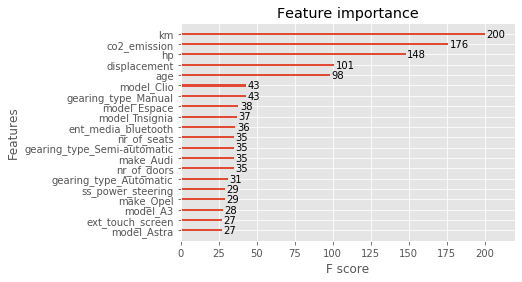

In [46]:
xgb.plot_importance(xg_reg, max_num_features=20)

### XGBoost with Imputed Missing Values

In [56]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE: 2178.530937


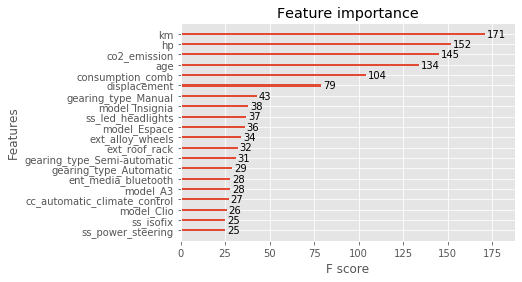

In [57]:
xgb.plot_importance(xg_reg, max_num_features=20)

### XGBoost with Missing Values

In [53]:
# Create features and target (df)
X_m = df_missing.drop('price', axis = 1) # features
y_m = df_missing['price'] # target

# Train-test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size = 0.3, random_state=57)

In [54]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(X_train_m, y_train_m)

preds = xg_reg.predict(X_test_m)

rmse = np.sqrt(mean_squared_error(y_test_m, preds))
print("RMSE: %f" % (rmse))

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE: 1689.542295


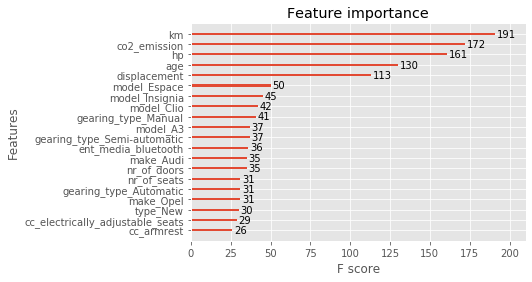

In [55]:
xgb.plot_importance(xg_reg, max_num_features=20)